In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
%run classes/music.py

In [11]:
music = Music()
music.read('sounds/wav/cello_pluck/expert/c2g2.wav')

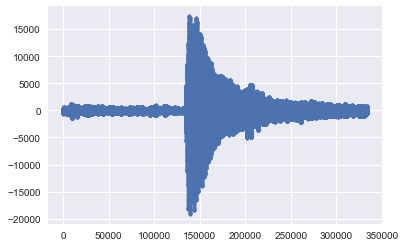

In [12]:
plt.plot(music.chan1, ".")

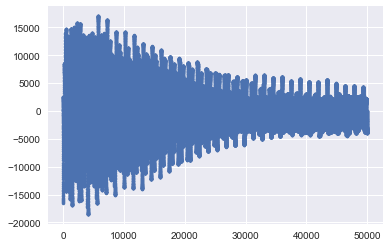

In [16]:
stub = music.chan1[140000:190000]
plt.plot(stub, ".")

(0, 400)

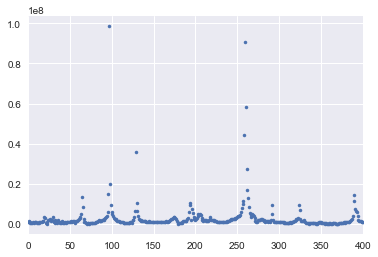

In [22]:
from scipy.fftpack import fft

fft_data = np.abs(fft(stub))

conversion_factor = music.sample_rate / len(fft_data)
x = [i * conversion_factor for i in range(len(fft_data))]

plt.plot(x, fft_data, ".")
plt.xlim(0, 400)

# plt.axvline(65.4, color="k")
# plt.axvline(98, color="k")
# plt.axvline(146, color="k")
# _ = plt.axvline(220, color="k")

In [10]:
music.save("/Users/pbezuhov/Desktop/output.xml")